# K-Means ++

Consider the problem, where for a given dataset X the goal is to find points c1, ..., cK that minimize the following objective function: FX (c1, ..., cK ) = max min d(x, ci), x∈X ci, where d(·, ·) stands for the Euclidean distance (the centers do not have to be necessarily taken from X ). Consider the following simple greedy algorithm for the computation of c1 , ..., cK : Choose c1 arbitrarily. For i = 2, ..., K, given c1, ..., ci−1, choose as ci this point from X such that its distance to the closest point from the already chosen centers c1,...,ci−1 is maximal.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

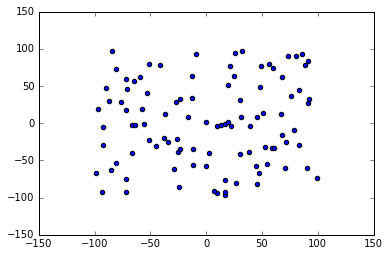

In [4]:
# creating a dataset to work on. Assuming (for simplicity) 
# that this dataset is 2D, i.e. all points can be encoded as 
# (x,y) and let's suppose there are 100 points in the dataset
# that all lay between x,y ∈ [-100;100]

X = []
for i in range(100):
    x = (random.randint(-100,100), random.randint(-100,100))
    X.append(x)

for x in X:
    plt.scatter(x[0],x[1])
plt.show()

### Start of the algorithm:

In [5]:
def dist(a,b):
    
    '''Returns the Euclidean Distance between a and b'''
    
    dist = np.linalg.norm(np.array(a)-np.array(b))
    return dist

In [6]:
def K_prob(X ,numb_centers):
    
    '''Identifies the k centers that satisfy the minimization of the 
    cost function'''
    
    # initializing variables: number of centers and randomely 
    # selected first center
    
    k = numb_centers
    
    # let's select our first center at random from the dataset X
    
    s = [random.sample(X,1)]

    dist_min = {}
    
    # as long as we don't have the correct amount of centers, we 
    # look for the point that has the maximum minimum distance to 
    # existing centers
    
    while len(s) < k:
        for c in range(0,len(s)):
            for i in range(0,len(X)):
                if c == 0:
                    dist_min[X[i]] = [dist(X[i],s[c])]
                else:
                    dist_min[X[i]].append(dist(X[i],s[c]))

        # selecting the minimum distance from each point in the dataset 
        # to another point
        for x in X:
            dist_min[x] = min(dist_min[x]) 

        # selecting the max distance to choose next center
        max_d = max(dist_min, key=lambda r: dist_min[r])
        s.append(max_d)
   
    return s

In [7]:
def cost_func(X, centers):
    
    '''Calculates the cost function of the K-problem algorithm'''
    
    cost_func_min = {}
    for ind, c in enumerate(centers):
        for i in X:
            if ind == 0:
                cost_func_min[i] = [dist(i,c)]
            else:
                cost_func_min[i].append(dist(i,c))
    
    result = {}
    for x in X:
        result[x] = min(cost_func_min[x])
    
    max_cost = max(result.values())
    sum_cost = 0
    for x in result.values():
        sum_cost += x 

    return [sum_cost, max_cost]

In [8]:
# running the K-problem algorithm to select the 10 centers:
solution = K_prob(X, 10)
cost_function = cost_func(X, solution)

In [9]:
print('The centers are:\n', solution,  '\n\nThe value of the max cost function is:\n', cost_function[1], '\n\nThe value of the sum of all cost functions within the dataset is:\n', cost_function[0])

The centers are:
 [[(-27, 28)], (99, -74), (-93, -92), (86, 93), (7, -91), (-84, 97), (67, 13), (-92, -5), (-9, 93), (-23, -35)] 

The value of the max cost function is:
 59.5399025864 

The value of the sum of all cost functions within the dataset is:
 2834.93143737
